In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
def calc_periodic_mass_center(pos, size):
    periodic_center = np.zeros(2)
    norm_term = 2*np.pi/size
    for dim_idx in range(2):
        circ_coords = np.zeros((pos.shape[0], 2))
        circ_coords[:, 0] = np.cos((pos[:, dim_idx] * norm_term)) / norm_term
        circ_coords[:, 1] = np.sin((pos[:, dim_idx] * norm_term)) / norm_term
        mean_circ_coords = np.mean(circ_coords, axis=0)
        mean_angle = np.arctan2(-mean_circ_coords[1], -mean_circ_coords[0]) + np.pi
        periodic_center[dim_idx] = mean_angle/norm_term
    return periodic_center

(0, 50)

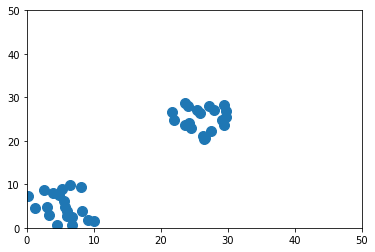

In [199]:
size = 50
positions = np.random.rand(40, 2)*10 
positions[0:20, 0] += 20
positions[0:20, 1] += 20
#positions = np.array([[1, 2],
#                      [3, 1],
#                      [3, 3],
#                      [1, 1]])
plt.plot(positions[:, 0], positions[:, 1], '.', ms=20)
plt.xlim((0,size))
plt.ylim((0,size))

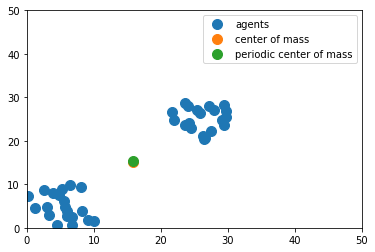

In [200]:
mass_center = np.mean(positions, axis=0)
periodic_mass_center = calc_periodic_mass_center(positions, size)
plt.plot(positions[:, 0], positions[:, 1], '.', ms=20, label='agents')
plt.plot(mass_center[0], mass_center[1], '.', ms=20, label='center of mass')
plt.plot(periodic_mass_center[0], periodic_mass_center[1], '.', ms=20, label='periodic center of mass')
plt.xlim((0,size))
plt.ylim((0,size))
plt.legend()

In [195]:
def PeriodicDist(x, y, L=10.0, dim=2):
    """ Returns the distance vector of two position vectors x,y
        by tanking periodic boundary conditions into account.

        Input parameters: L - system size, dim - number of dimensions
    """
    distvec = (y - x)
    distvec_periodic = np.copy(distvec)
    distvec_periodic[distvec < -0.5 * L] += L
    distvec_periodic[distvec > 0.5 * L] -= L

    return distvec_periodic


def plot_centered_positions(pos, center, size):
    cpos = PeriodicDist(center, pos, size)
    plt.plot(cpos[:, 0], cpos[:, 1], '.', ms=20, label='agents')
    plt.xlim([-size/2, size/2])
    plt.ylim([-size/2, size/2])

Text(0.5,1,'periodic center of mass')

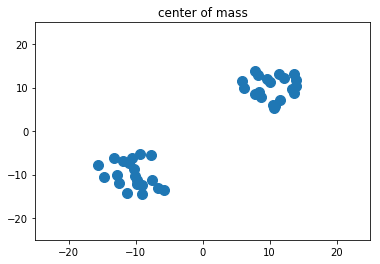

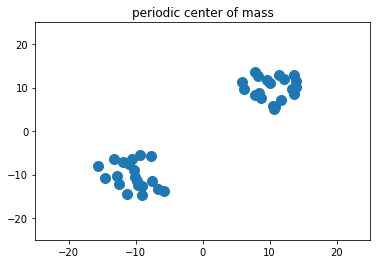

In [201]:
mass_center = np.mean(positions, axis=0)
periodic_mass_center = calc_periodic_mass_center(positions, size)
plt.figure()
plot_centered_positions(positions, mass_center, size)
plt.title('center of mass')

plt.figure()
plot_centered_positions(positions, periodic_mass_center, size)
plt.title('periodic center of mass')

In [202]:
mass_center

array([15.80272991, 15.04898968])

In [203]:
periodic_mass_center

array([15.79255748, 15.25985818])